In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Downloading Dataset

In [61]:
df_obesity = pd.read_csv("data/ObesityDataSet.csv")
df_obesity = df_obesity.rename(columns={'NObeyesdad': 'Obesity_level'})

In [62]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [63]:
df_obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_level
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [64]:
set(df_obesity['MTRANS'])

{'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking'}

In [65]:
# Walking -> 0
# Bike -> 0.15
# Public -> 0.5
# Motor -> 0.75
# Automobile -> 1

df_obesity['MTRANS'] = df_obesity['MTRANS'].map({'Walking': 0.0, 'Bike': 0.15, 'Public_Transportation': 0.5, 'Motorbike': 0.75, 'Automobile': 1.0})

In [66]:
set(df_obesity['CAEC']), set(df_obesity['CALC'])

({'Always', 'Frequently', 'Sometimes', 'no'},
 {'Always', 'Frequently', 'Sometimes', 'no'})

In [67]:
FREQ_CATEG_to_NUM = {'Always' : 1.0, 'Frequently' : 0.66, 'Sometimes' : 0.33, 'no' : 0.0}

df_obesity['CAEC'] = df_obesity['CAEC'].map(FREQ_CATEG_to_NUM)
df_obesity['CALC'] = df_obesity['CALC'].map(FREQ_CATEG_to_NUM)

In [68]:
set(df_obesity['family_history_with_overweight']), set(df_obesity['FAVC']), set(df_obesity['SMOKE']), set(df_obesity['SCC'])

({'no', 'yes'}, {'no', 'yes'}, {'no', 'yes'}, {'no', 'yes'})

In [69]:
BIN_CATEG_to_NUM = {'yes' : 1.0, 'no' : 0.0}

df_obesity['family_history_with_overweight'] = df_obesity['family_history_with_overweight'].map(BIN_CATEG_to_NUM)
df_obesity['FAVC'] = df_obesity['FAVC'].map(BIN_CATEG_to_NUM)
df_obesity['SMOKE'] = df_obesity['SMOKE'].map(BIN_CATEG_to_NUM)
df_obesity['SCC'] = df_obesity['SCC'].map(BIN_CATEG_to_NUM)

In [70]:
set(df_obesity['Gender'])

{'Female', 'Male'}

In [71]:
df_obesity['Gender'] = df_obesity['Gender'].map({'Male': 1.0, 'Female': 0.0})

In [72]:
set(df_obesity['Obesity_level'])


{'Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II'}

In [73]:
df_obesity['Obesity_level'] = df_obesity['Obesity_level'].map(
    {'Insufficient_Weight' : 0,
     'Normal_Weight'       : 1,
     'Obesity_Type_I'      : 2,
     'Obesity_Type_II'     : 3,
     'Obesity_Type_III'    : 4,
     'Overweight_Level_I'  : 5,
     'Overweight_Level_II' : 6})

In [74]:
df_obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_level
0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,0.33,0.0,2.000000,0.0,0.000000,1.000000,0.00,0.5,1
1,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,0.33,1.0,3.000000,1.0,3.000000,0.000000,0.33,0.5,1
2,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,0.33,0.0,2.000000,0.0,2.000000,1.000000,0.66,0.5,1
3,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,0.33,0.0,2.000000,0.0,2.000000,0.000000,0.66,0.0,5
4,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,0.33,0.0,2.000000,0.0,0.000000,0.000000,0.33,0.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,0.33,0.0,1.728139,0.0,1.676269,0.906247,0.33,0.5,4
2107,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,0.33,0.0,2.005130,0.0,1.341390,0.599270,0.33,0.5,4
2108,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,0.33,0.0,2.054193,0.0,1.414209,0.646288,0.33,0.5,4
2109,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,0.33,0.0,2.852339,0.0,1.139107,0.586035,0.33,0.5,4


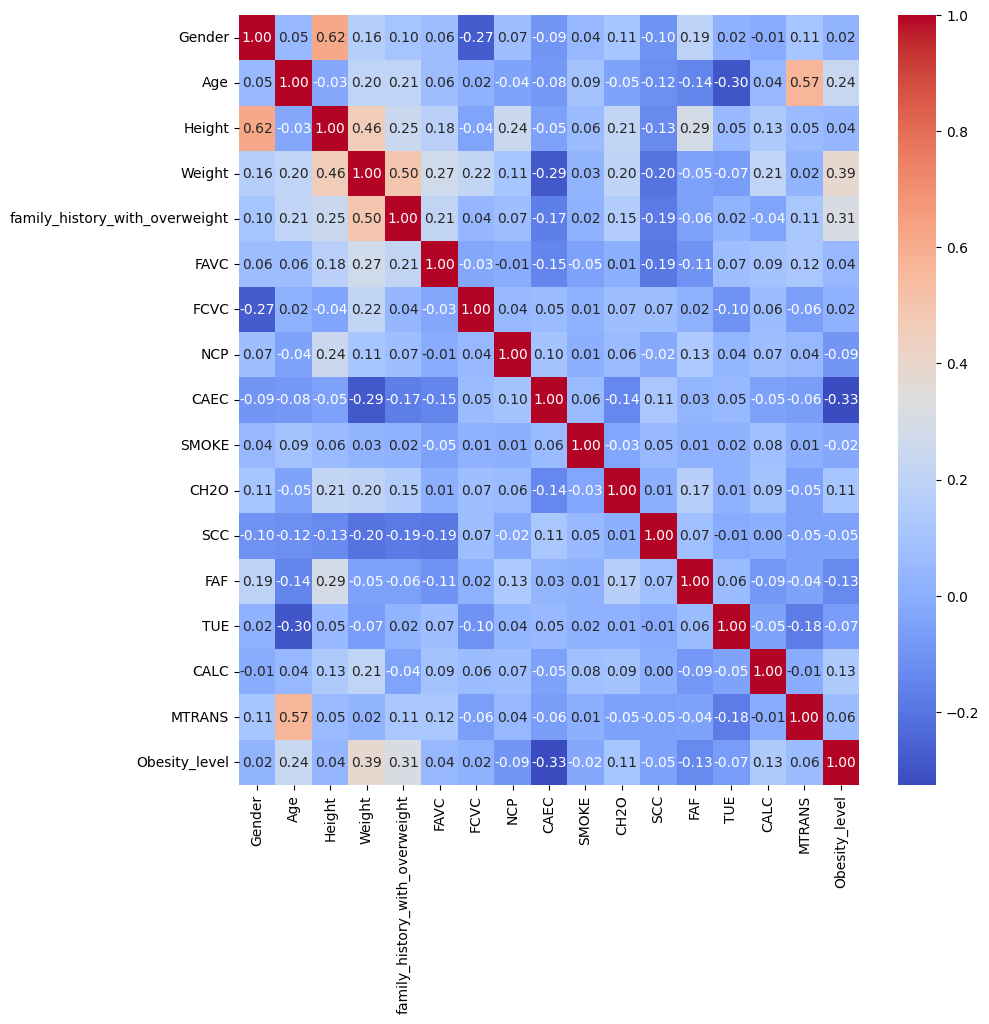

In [76]:
corr = df_obesity.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()